In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
image = cv2.imread("test_images/straight_lines1.jpg")

In [3]:
cv2.imshow('result', image)
cv2.waitKey(0)

-1

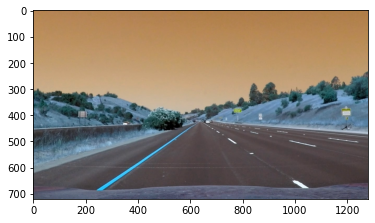

In [4]:
plt.imshow(image)
plt.show()

In [5]:
# so that changes are done to the copy
lane_img=np.copy(image)

In [6]:
def canny(image):
     #making the image gray to reduce processing time
    gray_img= cv2.cvtColor(lane_img, cv2.COLOR_RGB2GRAY)
    
    #reduce noise to reduce false edges
#gaussian blur smoothening

    blur_img =cv2.GaussianBlur(gray_img, (5,5), 0)
    
    # canny to find edges
#derivative small deriv small change big deriv is an edge
    canny_img = cv2.Canny(blur_img, 50, 150)
    return canny_img
    


In [7]:
canny_img = canny(lane_img)

In [8]:
cv2.imshow('results', canny_img)
cv2.waitKey(0)

-1

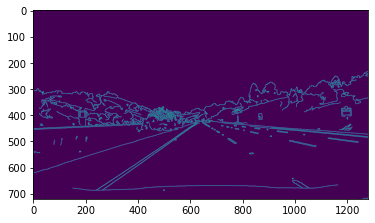

In [9]:
plt.imshow(canny_img)
plt.show()

In [10]:
#detect lanes using hough

def lane(image):
    height = image.shape[0]
    polygons= np.array([
        [(200,height), (1100,height),(630,410)]
    ])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask,polygons,255)
    #bitwise to show only whats in the mask
    masked_img= cv2.bitwise_and(image, mask)
    
    
    return masked_img

In [11]:
# cv2.imshow('result', lane(canny_img))
# cv2.waitKey(0)

In [28]:
# bitwise and operation mask and canny
cropped_img = lane(canny_img)
cv2.imshow('result', cropped_img)
cv2.waitKey(0)

-1

In [20]:
def display_lines(img,lines):
    line_image= np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line.reshape(4)
            cv2.line(line_image, (x1,y1), (x2,y2), (255, 0,0), 10)
            
    return line_image

In [29]:
#hough for straight lines
#sufficiently small bins

lines= cv2.HoughLinesP(cropped_img,2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)
line_img= display_lines(lane_img, lines)
cv2.imshow('result',line_img)
cv2.waitKey(0)

-1

In [19]:
# if lines is not None:
#     for line in lines:
#         print(line)

[[266 685 533 498]]
[[300 648 637 421]]
[[657 668 713 668]]
[[360 682 403 681]]
[[501 672 563 670]]
[[903 675 952 677]]
[[421 576 626 432]]
[[426 563 506 511]]
[[552 478 611 438]]
